In [87]:
import requests as req
from bs4 import BeautifulSoup
from datetime import datetime

userAgent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
headers = {'user-agent': userAgent}

URL = 'https://search.naver.com/search.naver?query=날씨'
res = req.get(URL,headers=headers)
res.raise_for_status()
print(res.status_code)
soup = BeautifulSoup(res.text,'html.parser')

200


In [82]:
location = soup.select_one('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.top_wrap > div.title_area._area_panel > h2.title')
temperature = soup.select_one('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.open > div:nth-child(1) > div > div.weather_info > div > div._today > div.weather_graphic > div.temperature_text > strong')
weather = soup.select_one('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.open > div:nth-child(1) > div > div.weather_info > div > div._today > div.temperature_info > p > span.weather.before_slash')
low_temper = soup.select_one('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.content_area > div.inner > div > div.list_box._weekly_weather > ul > li:nth-child(1) > div > div.cell_temperature > span > span.lowest')
high_temper = soup.select_one('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.content_area > div.inner > div > div.list_box._weekly_weather > ul > li:nth-child(1) > div > div.cell_temperature > span > span.highest')
fine_dust = soup.select_one('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.open > div:nth-child(1) > div > div.weather_info > div > div.report_card_wrap > ul > li:nth-child(1) > a > span')

print('==============================')
print('날씨 확인 프로그램')
print(f"접속 시간:{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print('==============================')
print(f'접속 위치: {location.string}')
print('------------------------------')
print('1. 현재 날씨 및 온도 확인')
print('2. 최저/최고 온도 확인')
print('3. 미세먼지 확인')
print('0. 종료')
print('------------------------------')

날씨 확인 프로그램
접속 시간:2023-05-17 10:14:40
접속 위치: 북구 문흥2동
------------------------------
1. 현재 날씨 및 온도 확인
2. 최저/최고 온도 확인
3. 미세먼지 확인
0. 종료
------------------------------


In [83]:
while True:

    print('번호를 입력하세요.')
    select = input(f'번호를 입력하세요.')
    print(select)
    if select == '1':
        print('------------------------------')
        print(weather.string,"/",temperature.get_text())
        print('------------------------------')
    elif select == '2':
        print('------------------------------')
        print(low_temper.get_text())
        print(high_temper.get_text())
        print('------------------------------')
    elif select == '3':
        print('------------------------------')
        print('미세먼지 확인')
        print(fine_dust.string)
        print('------------------------------')
    else:
        break

번호를 입력하세요.
1
------------------------------
구름많음 / 현재 온도25.9°
------------------------------
번호를 입력하세요.
2
------------------------------
최저기온16°
최고기온31°
------------------------------
번호를 입력하세요.
3
------------------------------
미세먼지 확인
좋음
------------------------------
번호를 입력하세요.



In [99]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

SCROLL_PAUSE_TIME = 1
SEARCH_KEY_WORD =  'python'

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),
                         options=webdriver.ChromeOptions())
driver.get('http://www.yes24.com')

element = driver.find_element(by=By.NAME, value='query')
element.send_keys(SEARCH_KEY_WORD)
element.submit()
time.sleep(SCROLL_PAUSE_TIME)
# CONT_CNT
element = driver.find_element(by=By.LINK_TEXT,value='평점순')
element.click()

In [177]:
userAgent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
headers = {'user-agent': userAgent}
URL = 'http://www.yes24.com/Product/Search?query=python&domain=ALL&page=1&order=CONT_CNT'

res = req.get(URL,headers=headers)
res.raise_for_status()
# print(res.status_code)
soup = BeautifulSoup(res.text,'html.parser')

books = soup.find_all('div', attrs={'class':'item_info'})
titles = soup.find_all('div', attrs={'class':'info_row info_name'})
prices = soup.find_all('div', attrs={'class':'info_row info_price'})
ratings = soup.find_all('span', attrs={'class':'rating_grade'})


for i, book in enumerate(ratings,0):
  print(titles[i].a.text)
  print(prices[i].strong.text)
  print(ratings[i].em.text)
  print('-'*50)


Building Machine Learning Systems with Python 한국어판
27,000원
10.0
--------------------------------------------------
파이썬 Python 2학년
15,300원
10.0
--------------------------------------------------
Python(파이썬)과 Matplotlib, NumPy, Pandas
10,000원
10.0
--------------------------------------------------
2023 빅데이터분석기사 실기 한권완성 필답형+작업형 [파이썬(Python)]
27,000원
10.0
--------------------------------------------------
Python Standard Library
18,000원
10.0
--------------------------------------------------
데이터에듀 빅데이터 분석기사 실기 with Python
28,800원
10.0
--------------------------------------------------
Python을 이용한 개인화 추천 시스템
20,000원
10.0
--------------------------------------------------
파이썬 라이브러리를 활용한 데이터 분석
35,100원
10.0
--------------------------------------------------
알 스웨이가트의 파이썬 프로젝트
25,200원
10.0
--------------------------------------------------
파이썬 머신러닝 실무 테크닉 100
22,500원
10.0
--------------------------------------------------
한 권으로 다지는 머신러닝&딥러닝 with 파이썬
32,000원
10.0
--------------------------------

In [183]:
import pandas as pd
import numpy as np

URL = 'https://www.melon.com/new/index.htm'
res = req.get(URL,headers=headers)
res.raise_for_status()
# print(res.status_code)
soup = BeautifulSoup(res.text,'html.parser')


곡명 = soup.find_all('div', attrs={'class':'ellipsis rank01'})
가수 = soup.find_all('div', attrs={'class':'ellipsis rank02'})
앨범 = soup.find_all('div', attrs={'class':'ellipsis rank03'})


index = []
곡목 = []
가수 = []
앨범 = []

for i, m in range(len(10)):
  print(곡명.span.a.text)
  print(가수.span.a.text)
  print(앨범.span.a.text)









ValueError: not enough values to unpack (expected 2, got 1)

In [29]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams['font.family'] = 'D2Coding ligature'

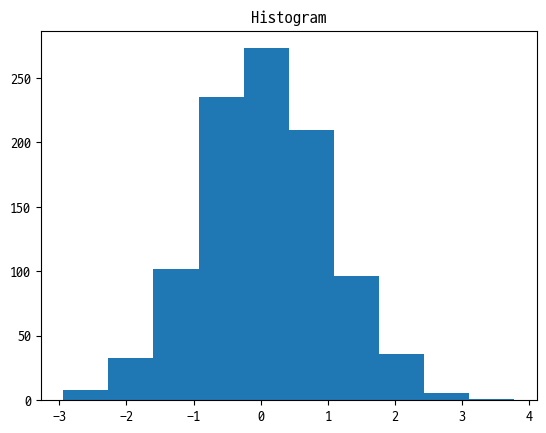

In [33]:
import numpy as np

y = np.random.randn(1000)
x = np.arange(len(y))

plt.hist(y,bins=10)
plt.title('Histogram')
plt.show()

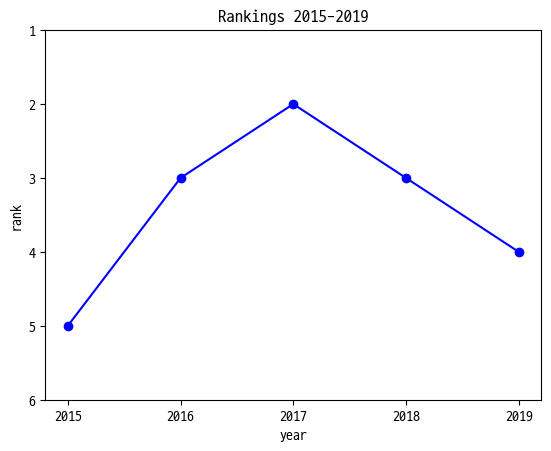

In [22]:

plt.plot([5,3,2,3,4],'o-b')
plt.xticks([0,1,2,3,4],['2015','2016','2017','2018','2019'],rotation=0)
plt.ylim(6,1)

plt.title("Rankings 2015-2019")
plt.xlabel('year')
plt.ylabel('rank')

plt.show()

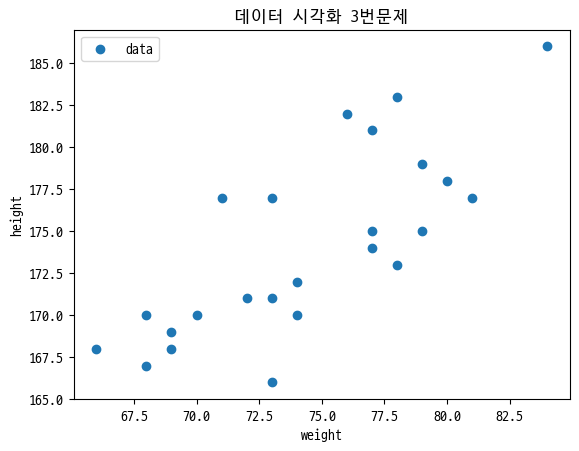

In [11]:
height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]

plt.scatter(weight,height,label='data')
plt.title("데이터 시각화 3번문제")
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(loc='best') 
plt.show()